# Étude de Santé Publique
### Par valentin Monteiro
>Sommaire

<button>
    <a href="r1">Requête 1</a>
</button>


### Import des library

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

<h3>Import des Dataframe</h3>
<p><span style="color: rgb(251, 160, 38);"><strong>df_aa</strong> = aide alimentaire</span><br>
<div style="margin-left: 20px;">
<p>Un fichier d&rsquo;aide alimentaire qui contient :</p>
<ul>
    <li>Le pays b&eacute;n&eacute;ficiaire.</li>
    <li>L&rsquo;ann&eacute;e.</li>
    <li>Le produit.</li>
    <li>La quantit&eacute; qui a &eacute;t&eacute; donn&eacute;e comme aide alimentaire, en tonnes.</li>
</ul>
</div>
   <span style="color: rgb(251, 160, 38);"><strong>df_da</strong> = dispo alimentaire</span><br><br>
<div style="margin-left: 20px;">    
<p>Un fichier de disponibilit&eacute; alimentaire pour l&rsquo;ann&eacute;e 2017 qui contient 17 variables :</p>
<ul>
    <li>Le pays.</li>
    <li>Le produit.</li>
    <li>4 variables de disponibilit&eacute; alimentaire. Ces 4 variables sont exprim&eacute;es dans des unit&eacute;s bien sp&eacute;cifiques, qui sont pr&eacute;cis&eacute;es directement dans le nom de la variable. &Agrave; noter cependant que la notation <em>kcal</em> est un abus de langage, elle correspond &agrave; une calorie r&eacute;elle.</li>
    <li>10 variables qui pr&eacute;cisent les utilisations/moyens d&rsquo;acquisition de la disponibilit&eacute; alimentaire. Elles sont toutes exprim&eacute;es en <strong>milliers de tonnes</strong>.</li>
    <li>Enfin, une variable type qui pr&eacute;cise si le produit est d&rsquo;origine animale ou v&eacute;g&eacute;tale.</li>
</ul>
</div>
<span style="color: rgb(251, 160, 38);"><strong>df_p</strong> = population<br></span>
<div style="margin-left: 20px;">
    <p>Un fichier de population qui inclut :</p>
<ul>
    <li>Le pays.</li>
    <li>L&rsquo;ann&eacute;e.</li>
    <li>La population du pays, exprim&eacute;e en milliers d&rsquo;habitants.</li>
</ul>
</div>
<span style="color: rgb(251, 160, 38);"><strong>df_sn</strong> = sous nutrition</span></p>
<div style="margin-left: 20px;">
    <p>Un fichier d&rsquo;ins&eacute;curit&eacute; alimentaire, qui inclut :</p>
<ul>
    <li>Le pays.</li>
    <li>Intervalle d&rsquo;ann&eacute;es.</li>
    <li>Le&nbsp;nombre de personnes en sous-alimentation en millions d&rsquo;habitants&nbsp;(ex. : pour l&rsquo;intervalle 2016-2018, le nombre de personnes correspond &agrave; la moyenne sur ces 3 ann&eacute;es, on peut le r&eacute;sumer en 2017).</li>
</ul>
</div>


In [66]:
df_aa = pd.read_csv("aide_alimentaire.csv")
df_da = pd.read_csv("dispo_alimentaire.csv")
df_p = pd.read_csv("population.csv")
df_sn = pd.read_csv("sous_nutrition.csv")
df_cereal = pd.read_csv("FAOSTAT_data_1-24-2022.csv")

### Nettoyage du dataframe Sous Nutrition

In [3]:
# Suppression des valeurs négligeable
df_sn = df_sn[(df_sn["Valeur"]== "<0.1") == False]
# Suppression des valeurs NULL
df_sn = df_sn[df_sn["Valeur"].notnull()]
# Conversion type valeur ➡️ float & million ➡️ millier
df_sn["Valeur"] = (df_sn.Valeur.astype(float))*1000
# Selection année 2017 dans un nouveau DATAframe
df_sn2017 = df_sn[(df_sn["Année"] == "2016-2018") == True]

### Nettoyage du dataframe Population

In [4]:
# Suppression des valeur NULL
df_p = df_p[df_p["Valeur"].notnull()]
# Selection année 2017 dans un nouveau DATAframe
df_p2017=df_p[(df_p["Année"] == 2017) == True]

## Requête 1: Proportion de personnes en état de sous nutrition

In [5]:
taux = (( sum(df_sn2017.Valeur) ) *100) / (sum(df_p2017.Valeur))
taux

7.097118203283067

## Résultat requête 2 : nombre théorique de personnes qui pourrait être nourri 

In [6]:
df_da_zone = df_da.groupby("Zone").sum()
df_dap = df_da_zone.merge(df_p2017, how="inner", left_on="Zone", right_on="Zone")
nb_theorique = (sum(df_dap["Disponibilité alimentaire (Kcal/personne/jour)"]*df_dap["Valeur"]))/2500
print(nb_theorique*1000)

8367593850.932399


<h2>Résultat requête 3: nombre théorique de personne qui pourrait être nourri - origine végétale</h2>

In [7]:
df_da_vegetal = df_da[df_da["Origine"] == "vegetale"]
#df_da_v = df_da_v == True
df_da_vegetal = df_da_vegetal.groupby("Zone").sum()
df_dap_vegetal = df_da_vegetal.merge(df_p2017, how="inner", left_on="Zone", right_on="Zone")
nb_theorique_vegetal = (sum(df_dap_vegetal["Disponibilité alimentaire (Kcal/personne/jour)"]*df_dap_vegetal["Valeur"]))/2500
print(nb_theorique_vegetal*1000)

6904305684.600402


In [8]:
s_da = df_da_zone.sum()
dispo_int = s_da["Disponibilité intérieure"]
s_da = s_da.drop(["Disponibilité intérieure","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"])
s_da_u = s_da.drop(["Exportations - Quantité","Importations - Quantité","Production","Variation de stock"])
s_da_u

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
dtype: float64

<h2>Résultat Requête 4 : Utilisation de la disponibilité Intérieur</h2>

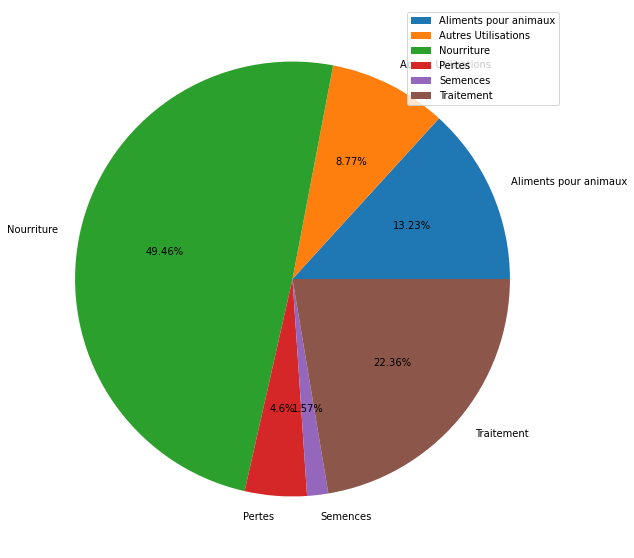

In [9]:
utilisation = s_da_u.plot.pie(y = "index", ylabel="", legend = True, figsize = (10, 10), autopct = lambda x: str(round(x, 2)) + '%' )

<h2>Résultat requête 5 : Pays où la proportion de personnes sous-alimentées est la plus forte en 2017</h2>

In [10]:
top_sa = df_p2017.merge(df_sn2017, how="inner", left_on="Zone", right_on="Zone")
top_sa["%"]= (top_sa.Valeur_y.astype(float)*100) / top_sa.Valeur_x.astype(float)
top_sa.sort_values(by="%", ascending=False).head(10)

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,%
32,Haïti,2017,10982.366,2016-2018,5300.0,48.259182
67,République populaire démocratique de Corée,2017,25429.825,2016-2018,12000.0,47.188685
45,Madagascar,2017,25570.512,2016-2018,10500.0,41.062924
44,Libéria,2017,4702.226,2016-2018,1800.0,38.279742
42,Lesotho,2017,2091.534,2016-2018,800.0,38.249438
76,Tchad,2017,15016.753,2016-2018,5700.0,37.957606
69,Rwanda,2017,11980.961,2016-2018,4200.0,35.055619
53,Mozambique,2017,28649.018,2016-2018,9400.0,32.810898
78,Timor-Leste,2017,1243.258,2016-2018,400.0,32.173531
0,Afghanistan,2017,36296.113,2016-2018,10500.0,28.928718


<h2>Requête 6 : Pays ayant bénéficié le plus d’aide depuis 2013 </h2>

In [11]:
df_aa.groupby(["Pays bénéficiaire"])["Valeur"].sum().sort_values(ascending = False).reset_index().head(10)

,Pays bénéficiaire,Valeur
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


In [12]:
df1 = df_dap.groupby(["Zone","Disponibilité alimentaire (Kcal/personne/jour)"], as_index = False) ["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
df2 = df1.merge(df_p2017, how = 'inner', on="Zone")
df2["disp/hab"]= df2["Disponibilité alimentaire (Kcal/personne/jour)"]/df2["Valeur"]
df2.sort_values(by = "disp/hab" ,ascending = False).head(10)


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,disp/hab
134,Saint-Kitts-et-Nevis,2491.0,2017,52.045,47.862427
18,Bermudes,2668.0,2017,63.049,42.316294
46,Dominique,2930.0,2017,71.458,41.003107
135,Saint-Vincent-et-les Grenadines,2965.0,2017,109.827,26.997004
82,Kiribati,3042.0,2017,114.158,26.647278
6,Antigua-et-Barbuda,2416.0,2017,95.426,25.318047
58,Grenade,2442.0,2017,110.874,22.025001
137,Samoa,2956.0,2017,195.352,15.131660
136,Sainte-Lucie,2589.0,2017,180.954,14.307504
138,Sao Tomé-et-Principe,2398.0,2017,207.089,11.579562


<h2>Request 7: top10  Diponibilité/habitants la plus élevée</h2>

In [13]:
df1.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending = False).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
157,Turquie,3708.0
169,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
166,Égypte,3518.0
4,Allemagne,3503.0


<h2>Request 8: top10  Diponibilité/habitans la moins élevée</h2>

In [14]:
df1.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending = True).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
127,République centrafricaine,1879.0
164,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
132,République populaire démocratique de Corée,2093.0
150,Tchad,2109.0
165,Zimbabwe,2113.0
114,Ouganda,2126.0
152,Timor-Leste,2129.0


In [87]:
df_cereal.Produit = df_cereal.Produit.apply(lambda x: x.replace("Maés", "Maïs"))
df_cereal.Produit = df_cereal.Produit.apply(lambda x: x.replace("?", "é"))
df_cereal.Produit = df_cereal.Produit.apply(lambda x: x.replace("Riz (Eq Blanchi)", "Riz et produits"))
liste_cereal1 = df_cereal["Produit"].unique()
liste_cereal = []

liste_cereal2 = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits","Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]
liste_cereal2

['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres']

In [88]:
for x in liste_cereal1:
    liste_cereal.append(x)

liste_cereal

['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres']

In [89]:
liste_cereal == liste_cereal2

True

In [90]:
df_da_cereal = df_da.loc[df_da["Produit"].isin(liste_cereal),:]
total_cereal = df_da_cereal["Disponibilité intérieure"].sum()
total_nourriture_cereal = df_da_cereal["Nourriture"].sum()
total_animal_cereal = df_da_cereal["Aliments pour animaux"].sum()


<h2>Proportion d'utilisation de céréale utilisé pour l'alimentation humaine</h2>

In [91]:
rate_use_cereal_human = (total_nourriture_cereal*100)/total_cereal
rate_use_cereal_human

18.130550970683014

<h2>Proportion d'utilisation de céréale utiliser pour l'alimentation animal</h2>

In [92]:
rate_use_cereal_animal = (total_animal_cereal*100)/total_cereal
rate_use_cereal_animal 

69.33506248526291

## Problème dans liste des céréale
``` "Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits","Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"` ```

> Seuls l'Avoines & Céréales, Autres sont compté dans les résultats précédent

In [40]:
df_da["Produit"].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [99]:
df_cereal.Produit = df_cereal.Produit.apply(lambda x: x.replace(" et produits", ""))
df_cereal.Produit = df_cereal.Produit.apply(lambda x: x.replace("Riz", "Riz (Eq Blanchi)"))
liste_cereal1 = df_cereal["Produit"].unique()
liste_cereal_reel = []
for x in liste_cereal1:
    liste_cereal_reel.append(x)

liste_cereal_reel

['Blé',
 'Riz (Eq Blanchi)',
 'Orge',
 'Maïs',
 'Seigle',
 'Avoine',
 'Millet',
 'Sorgho',
 'Céréales, Autres']

In [100]:
# Liste réel : "Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"
#df_da_cereal = df_da[df_da["Produit"].isin(["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"])]
df_da_cereal = df_da.loc[df_da["Produit"].isin(liste_cereal_reel),:]
total_cereal = df_da_cereal["Disponibilité intérieure"].sum()
total_nourriture_cereal = df_da_cereal["Nourriture"].sum()
total_animal_cereal = df_da_cereal["Aliments pour animaux"].sum()


## Proportion d'utilisation de céréale utilisé pour l'alimentation humaine

In [101]:
rate_use_cereal_human = (total_nourriture_cereal*100)/total_cereal
rate_use_cereal_human

42.75074480712289

## Proportion d'utilisation de céréale utiliser pour l'alimentation animal

In [102]:
rate_use_cereal_animal = (total_animal_cereal*100)/total_cereal
rate_use_cereal_animal 

36.291456706047654

In [103]:
df_da_thai = (df_da["Zone"]=="Thaïlande")&(df_da["Produit"]=="Manioc")
df_da_thailande = df_da[df_da_thai]
df_da_thailande[["Zone","Produit","Exportations - Quantité","Production"]]

,Zone,Produit,Exportations - Quantité,Production
13809,Thaïlande,Manioc,25214.0,30228.0


In [104]:
exportation_rate = (df_da_thailande["Exportations - Quantité"]*100)/df_da_thailande["Production"]

<h2>Taux d'exportation du manioc en Thaïlande</h2>

In [105]:
print(exportation_rate)

13809    83.41273
dtype: float64
